# COGS 108 - Final Project (Climate)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

## Video 
https://youtu.be/j7MY4FMj5hg

# Overview

Our project aimed to look at the correlation between pollution and lung cancer rates within counties across California. We did so by combining datasets with public information, quantifying pollution with AQI, and using scatterplots and linear regression. Our results indicate that there is a positive correlation between pollution and the development of lung cancer. 

# Names

- Nilou Shahbandi
- Leonardo Gonzalez
- Brian Chen
- Tin-Trung Pham
- Zhongkang(Ken) Fang

<a id='research_question'></a>
# Research Question

How do pollutants in California impact the rate of lung and bronchus cancer across different counties? 

<a id='background'></a>

## Background & Prior Work

#### Why it is of interest to us:
Climate change is a now problem, but it often seems that many understand climate change as a “future” problem. We wanted to provide a new perspective on why we must make changes to prevent climate change now. It has been said that “younger generations are the future” and we believe that. However, what if we could show how pollutants are impacting generations now? What if it was obvious that the impact of climate change is more than volatile weather to come? That’s what we want to do by answering this question.
#### Why it is important:
Prior to research, we all knew that pollution wasn’t a good thing. After diving deeper, we found that exposure to air pollution for extended durations can be an impacting factor in respiratory diseases like asthma and lung cancer **(1)**. In a study, we found that respiratory illnesses can be attributed to pollution, and this can be broken down into outdoor and indoor pollutants **(1)**. From this, we know that the association between pollutants and respiratory disease is true, but to what degree and amongst whom? By taking the time to carefully answer this question with thorough analysis we can offer pointers in the right direction for where to start solving this issue of air pollution and the damage it causes.
#### Previously done work:
Since we are concerned with the future, we wanted to explore any prior work regarding the development of respiratory illness. Eventually, we reviewed a study that focused on the implications of lung diseases with early exposure **(2)**. By closely measuring pollution at the chemical level, associations were able to be formed regarding the impact on individuals **(2)**. One particular focus of this study found associations in prenatal air pollution exposure with several impacts on birth, along with this, the study revealed both short-term and long-term effects on respiratory health **(2)**. We wanted to take this a step further by looking at major pollutants and to what extent these pollutants affects individuals. 



References (include links):
- 1) Jiang, Xu-Qin et al. “Air pollution and chronic airway diseases: what should people know and do?.” Journal of thoracic disease vol. 8,1 (2016): E31-40. doi:10.3978/j.issn.2072-1439.2015.11.50 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4740163. 
- 2) Kim, Dasom et al. “Air pollutants and early origins of respiratory diseases.” Chronic diseases and translational medicine vol. 4,2 75-94. 7 Jun. 2018, doi:10.1016/j.cdtm.2018.03.003 https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6033955.


# Hypothesis


**We believe that high amounts of nitrogen dioxide, sulfur dioxide, carbon monoxide, and ozone will all be highly correlated to higher rates of lung cancer among people. Areas with a higher concentration of these chemicals will be marked as an area with bad air quality, and the places that have worse air quality will lead to a higher rate of cancer in people than in other places that aren’t as contaminated.**

The reason why we believe in this hypothesis is because we know that there is respiratory illnesses associated with pollution. In particular, while pollution consists of many different types of contaminants, we hear in climate change discussions the highlighting of "carbon emmisions". From this, we surmise that carbon monoxide (an particulate included in AQI) will be an indicator in these respiratory illnesses.

# Dataset(s)

### *Dataset 1*

- **Dataset Name**: AQI California data by county for 2010-2018
- **Link to the dataset**: https://aqs.epa.gov/aqsweb/airdata/download_files.html
- **Number of observations**: 2898
- **Description**: data contains AQI from 2010-2018, calculated each day for each monitor for the Criteria Gases and PM10 and PM2.5 (FRM and non FRM). Number of Days CO, NO2, Ozone, SO2, PM2.5, PM10 where the daily monitor criteria were met.


### *Dataset 2*

- **Dataset Name**: Lung and Bronchus Cancer Incidence in California
- **Link to the dataset**:[California Cancer Registry](https://explorer.ccrcal.org/application.html?site=47&data_type=1&graph_type=13&compareBy=sex&chk_sex_1=1&race=1&age_range=9&hdn_stage=101&year=4&advopt_precision=4&advopt_display=2#tableWrap)
- **Number of observations**: 9306
- **Description**: This data shows us the counts of lung or bronchus cancer in individuals of all races and sexes by county in California. It also includes breakdowns by age with additional statistics regarding the data.

We plan to use this data in combination with the pollution data to track the impact of pollution on lung or bronchus cancer indcidents in individuals living in California. By comparing changes in pollution with changes in cancer incident counts.


### *Dataset 3*

- **Dataset Name**: Current Asthma by State, 2018
- **Link to the dataset**:  https://www.lung.org/research/trends-in-lung-disease/asthma-trends-brief/data-tables/asthma-current-state
- **Number of observations**: 32
- **Description**: This data shows the count and percent of people with asthma in each state in 2018. We will  combine this with the AQI by state to do a comparison of asthmas by state vs pollution by state to see if there is a correlation. 


### *Dataset 4*

- **Dataset Name**: AQI state data for 2018
- **Link to the dataset**:  https://aqs.epa.gov/aqsweb/airdata/download_files.html
- **Number of observations**: 1022
- **Description**: data contains AQI state data from 2018, calculated each day for each monitor for the Criteria Gases and PM10 and PM2.5 (FRM and non FRM). Number of Days CO, NO2, Ozone, SO2, PM2.5, PM10 where the daily monitor criteria were met.
#### Description and Usage:
For our project we plan to use these three datasets to help answer our research question. We plan on using the both the cancer data and asthma data in conjunction with the AQI data to answer our question. In each, we will be seeing how these lung diseases correlate to the change in AQI throughout California over the course of the recent years.

# Setup

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import pearsonr, norm, ttest_ind


aqi_2010 = pd.read_csv('data/aqireport2010.csv')
aqi_2011 = pd.read_csv('data/aqireport2011.csv')
aqi_2012 = pd.read_csv('data/aqireport2012.csv')
aqi_2013 = pd.read_csv('data/aqireport2013.csv')
aqi_2014 = pd.read_csv('data/aqireport2014.csv')
aqi_2015 = pd.read_csv('data/aqireport2015.csv')
aqi_2016 = pd.read_csv('data/aqireport2016.csv')
aqi_2017 = pd.read_csv('data/aqireport2017.csv')
aqi_2018 = pd.read_csv('data/aqireport2018.csv')
county_cancer_all = pd.read_csv('data/countyCancer.csv')
asthma = pd.read_csv('data/Asthma.csv')

# Data Cleaning

To initialize our data cleaning process, we created a standardizing function. This function is reponsible for taking in proper county names from our cancer and AQI data and standardizing to stripped and lowercase county names.

In [2]:
def standardize_region(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        output = str_in

        if 'county, ca' in str_in:
            str_in = str_in.replace('county, ca', '')
            str_in = str_in.strip()
            output = str_in
            
        if 'county' in str_in:
            str_in = str_in.replace('county', '')
            str_in = str_in.strip()
            output = str_in
            
            
    except:
        output = np.nan
        
    return output


To begin cleaning we start with our lung and bronchus cancer data set. We make sure to drop all irrelevant categories in the dataset and then standardize the county names.

In [3]:
county_cancer_all = pd.read_csv('data/countyCancer.csv')
county_cancer_all = county_cancer_all[county_cancer_all['Age'] == 'All Ages']
county_cancer_all.drop(['Sex', 'Race/Ethnicity', 'Age', 'Stage at Diagnosis', 'Age-adjusted Rate Standard Error',
                         'Age-adjusted Rate Lower Confidence Interval', 'Age-adjusted Rate Upper Confidence Interval'], 
                 inplace = True, axis=1)
county_cancer_all['California Region'] = county_cancer_all['California Region'].apply(standardize_region)
county_cancer_all.columns = ['year','county', 'rate per 100,000', 'count']
county_cancer_all = county_cancer_all[county_cancer_all['rate per 100,000'] != 'a']
county_cancer_all.head()

,year,county,"rate per 100,000",count
0,2010,alameda,44.8118,646
1,2010,butte,63.0616,171
2,2010,contra costa,50.2429,536
3,2010,el dorado,54.2364,124
4,2010,fresno,51.7782,401


Also, we need to ensure that the data type is workable and so we make sure the rates and counts are numbers and no longer strings.

In [4]:
# Change string to float and type
county_cancer_all.dtypes
county_cancer_all['rate per 100,000'] = county_cancer_all['rate per 100,000'].astype(float)
county_cancer_all['count'] = county_cancer_all['count'].astype(int)

While our cancer dataset is nicely combined with all years from 2010-2018, our AQI set is not so lucky. So we first seperate each cancer set with the respective year so that we can later combine it with the AQI data. Here we begin with the year 2010, extracting the 2010 cancer set from the whole set. We progress from 2010 to 2018.

Additionally, we clean all of the AQI data sets from 2010 to 2018 to prepare for this as well.

In [5]:
# AQI 2010-2018 combine with Cancer rate 2010-2018
county_cancer_2010 = county_cancer_all[county_cancer_all['year'] == 2010]
county_cancer_2011 = county_cancer_all[county_cancer_all['year'] == 2011]
county_cancer_2012 = county_cancer_all[county_cancer_all['year'] == 2012]
county_cancer_2013 = county_cancer_all[county_cancer_all['year'] == 2013]
county_cancer_2014 = county_cancer_all[county_cancer_all['year'] == 2014]
county_cancer_2015 = county_cancer_all[county_cancer_all['year'] == 2015]
county_cancer_2016 = county_cancer_all[county_cancer_all['year'] == 2016]
county_cancer_2017 = county_cancer_all[county_cancer_all['year'] == 2017]
county_cancer_2018 = county_cancer_all[county_cancer_all['year'] == 2018]

# 2010
aqi_2010.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2010.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2010['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2010['year'] = 2010

# 2011
aqi_2011.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2011.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2011['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2011['year'] = 2011

# 2012
aqi_2012.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2012.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2012['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2012['year'] = 2012

# 2013
aqi_2013.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2013.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2013['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2013['year'] = 2013

#2014
aqi_2014.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2014.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2014['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2014['year'] = 2014

#2015
aqi_2015.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2015.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2015['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2015['year'] = 2015

# 2016
aqi_2016.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2016.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2016['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2016['year'] = 2016

# 2017
aqi_2017.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2017.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2017['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2017['year'] = 2017

#2018
aqi_2018.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2018.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2018['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2018['year'] = 2018

In [6]:
aqi_comb = pd.concat([aqi_2010,aqi_2011,aqi_2012,aqi_2013,aqi_2014,aqi_2015,aqi_2016,aqi_2017,aqi_2018])
#aqi_comb = aqi_comb.drop(columns=["County"])
aqi_comb

,county,Good days,Unhealthy days,AQI 90th Percentile,AQI Median,year
0,alameda,245,4,68.0,43.0,2010
1,amador,302,10,64.0,35.0,2010
2,butte,208,13,84.0,47.0,2010
3,calaveras,271,12,84.0,41.0,2010
4,colusa,322,1,49.0,38.0,2010
...,...,...,...,...,...,...
48,trinity,173,12,79.0,44.0,2018
49,tulare,73,95,140.0,77.0,2018
50,tuolumne,254,20,80.0,43.0,2018
51,ventura,174,16,87.0,52.0,2018


To show an example of what we are doing, here is a snippet of us merging the AQI data with the cancer data. We also make sure that the types in our new merged data frame are workable as floats where they should be (e.g. rates should be numbers).

In [7]:
# Drop the year column after combining
aqi_2010 = aqi_2010.drop(columns=["year"])
aqi_2011 = aqi_2011.drop(columns=["year"])
aqi_2012 = aqi_2012.drop(columns=["year"])
aqi_2013 = aqi_2013.drop(columns=["year"])
aqi_2014 = aqi_2014.drop(columns=["year"])
aqi_2015 = aqi_2015.drop(columns=["year"])
aqi_2016 = aqi_2016.drop(columns=["year"])
aqi_2017 = aqi_2017.drop(columns=["year"])
aqi_2018 = aqi_2018.drop(columns=["year"])

In [8]:
# combine cancer and aqi data for the year of 2010
# county_cancer_2010 = county_cancer_2010.drop(county_cancer_2010.index[39:47])
aqi_cancer_2010 = pd.merge(county_cancer_2010, aqi_2010, on='county')
aqi_cancer_2010.head()
aqi_cancer_2010['rate per 100,000'] = aqi_cancer_2010['rate per 100,000'].astype(float)
aqi_cancer_2010['count'] = aqi_cancer_2010['count'].astype(float)
#aqi_cancer_2010['Unhealthy days'] = aqi_cancer_2010['Unhealthy days'].astype(int)
aqi_cancer_2010.head()

,year,county,"rate per 100,000",count,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,2010,alameda,44.8118,646.0,245,4,68.0,43.0
1,2010,butte,63.0616,171.0,208,13,84.0,47.0
2,2010,contra costa,50.2429,536.0,307,8,64.0,39.0
3,2010,el dorado,54.2364,124.0,251,23,93.0,42.0
4,2010,fresno,51.7782,401.0,99,65,130.0,70.0


This is the repitition of that snippet among all other years that we are concerned with. And finally at the end, we combine and merge all these sets together to create a fully merged AQI and cancer dataset.

In [9]:
aqi_cancer_2010 = pd.merge(county_cancer_2010, aqi_2010, on='county')
aqi_cancer_2010['rate per 100,000'] = aqi_cancer_2010['rate per 100,000'].astype(float)
aqi_cancer_2010['count'] = aqi_cancer_2010['count'].astype(float)

aqi_cancer_2011 = pd.merge(county_cancer_2011, aqi_2011, on='county')
aqi_cancer_2011['rate per 100,000'] = aqi_cancer_2011['rate per 100,000'].astype(float)
aqi_cancer_2011['count'] = aqi_cancer_2011['count'].astype(float)

aqi_cancer_2012 = pd.merge(county_cancer_2012, aqi_2012, on='county')
aqi_cancer_2012['rate per 100,000'] = aqi_cancer_2012['rate per 100,000'].astype(float)
aqi_cancer_2012['count'] = aqi_cancer_2012['count'].astype(float)

aqi_cancer_2013 = pd.merge(county_cancer_2013, aqi_2013, on='county')
aqi_cancer_2013['rate per 100,000'] = aqi_cancer_2013['rate per 100,000'].astype(float)
aqi_cancer_2013['count'] = aqi_cancer_2013['count'].astype(float)

aqi_cancer_2014 = pd.merge(county_cancer_2014, aqi_2014, on='county')
aqi_cancer_2014['rate per 100,000'] = aqi_cancer_2014['rate per 100,000'].astype(float)
aqi_cancer_2014['count'] = aqi_cancer_2014['count'].astype(float)

aqi_cancer_2015 = pd.merge(county_cancer_2015, aqi_2015, on='county')
aqi_cancer_2015['rate per 100,000'] = aqi_cancer_2015['rate per 100,000'].astype(float)
aqi_cancer_2015['count'] = aqi_cancer_2015['count'].astype(float)

aqi_cancer_2016 = pd.merge(county_cancer_2016, aqi_2016, on='county')
aqi_cancer_2016['rate per 100,000'] = aqi_cancer_2016['rate per 100,000'].astype(float)
aqi_cancer_2016['count'] = aqi_cancer_2016['count'].astype(float)

aqi_cancer_2017 = pd.merge(county_cancer_2017, aqi_2017, on='county')
aqi_cancer_2017['rate per 100,000'] = aqi_cancer_2017['rate per 100,000'].astype(float)
aqi_cancer_2017['count'] = aqi_cancer_2017['count'].astype(float)

aqi_cancer_2018 = pd.merge(county_cancer_2018, aqi_2018, on='county')
aqi_cancer_2018['rate per 100,000'] = aqi_cancer_2018['rate per 100,000'].astype(float)
aqi_cancer_2018['count'] = aqi_cancer_2018['count'].astype(float)

# Combining all years of AQI and cancer data into one.
aqi_cancer_comb = pd.concat([aqi_cancer_2010,aqi_cancer_2011,aqi_cancer_2012,aqi_cancer_2013,aqi_cancer_2014,aqi_cancer_2015,aqi_cancer_2016,aqi_cancer_2017,aqi_cancer_2018])
aqi_cancer_comb

,year,county,"rate per 100,000",count,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,2010,alameda,44.8118,646.0,245,4,68.0,43.0
1,2010,butte,63.0616,171.0,208,13,84.0,47.0
2,2010,contra costa,50.2429,536.0,307,8,64.0,39.0
3,2010,el dorado,54.2364,124.0,251,23,93.0,42.0
4,2010,fresno,51.7782,401.0,99,65,130.0,70.0
...,...,...,...,...,...,...,...,...
34,2018,stanislaus,44.7967,260.0,157,32,108.0,54.0
35,2018,sutter,53.6884,62.0,153,22,100.0,54.0
36,2018,tulare,27.9206,122.0,73,95,140.0,77.0
37,2018,ventura,38.4863,401.0,174,16,87.0,52.0


Ensuring that the final datatypes are correct.

In [10]:
aqi_cancer_comb.dtypes

year                     int64
county                  object
rate per 100,000       float64
count                  float64
Good days                int64
Unhealthy days          object
AQI 90th Percentile    float64
AQI Median             float64
dtype: object

Here we are checking and cleaning the asthma data.

In [11]:
asthma.head()

,State,ChildCount,Percent,Year,AdultCount,Percent.1
0,Alabama,"141,500",13.20%,2014.0,"394,600",10.50%
1,Alaska,---,---,NaN,"50,700",9.20%
2,Arizona,"129,200",8.10%,2016.0,"545,100",10.00%
3,Arkansas,---,---,NaN,"225,900",9.80%
4,California,"542,700",6.20%,NaN,"2,607,600",8.50%


In [12]:
asthma.groupby('Year').describe()

State                           ChildCount                       \
       count unique           top freq      count unique      top freq   
Year                                                                     
2011.0     1      1          Iowa    1          1      1   41,600    1   
2012.0     2      2  North Dakota    1          2      2   10,000    1   
2014.0     4      4       Alabama    1          4      4  141,500    1   
2015.0     2      2     Louisiana    1          2      2   94,100    1   
2016.0     3      3       Arizona    1          3      3  129,200    1   

       Percent                     AdultCount                      Percent.1  \
         count unique     top freq      count unique      top freq     count   
Year                                                                           
2011.0       1      1   5.80%    1          1      1  191,000    1         1   
2012.0       2      2   6.50%    1          2      2   47,000    1         2   
2014.0       4      4  13.20%    1          4      4  394,600    1         4   
2015.0       2      2   8.80%    1          2      2  316,400    1         2   
2016.0       3      3   8.10%    1          3      3  545,100    1         3   

                            
       unique     top freq  
Year                        
2011.0      1   7.90%    1  
2012.0      2   8.20%    1  
2014.0      4  10.50%    1  
2015.0      2   8.90%    1  
2016.0      3  10.00%    1

We can see that the majority of the data pertains to 2018, so in order to keep our data consistent, we will be omitting any data outside of 2018.



In [13]:
# data cleaning for asthma 
asthma.columns = asthma.columns.str.lower()

asthma = asthma.rename(columns={"childcount": "child", "percent": "child_percent", "adultcount": "adult",'percent.1': 'adult_percent'})

asthma = asthma.fillna(2018)
asthma["year"] = asthma["year"].astype(int)

In [14]:
# taking out commas and percent signs
asthma['child']= asthma['child'].str.replace(',', '')
asthma['adult']= asthma['adult'].str.replace(',', '')
asthma['child_percent']= asthma['child_percent'].str.replace('%', '')
asthma['adult_percent']= asthma['adult_percent'].str.replace('%', '')

# function to remove empty values
def standardize_asthma(string):
    if string == '---':
        string = np.nan

    return string

In [15]:
# function to drop any year other than 2018
def standardize_year(string):
    if string != 2018:
        string = np.nan
    return string

In [16]:
# applying the function to clean asthma 
asthma['child'] = asthma['child'].apply(standardize_asthma)
asthma = asthma.dropna(subset=['child'])
asthma['adult'] = asthma['adult'].apply(standardize_asthma)
asthma = asthma.dropna(subset=['adult'])

# applying function to drop irrelevant years
asthma['year'] = asthma['year'].apply(standardize_year)
asthma = asthma.dropna(subset=['year'])


# converting from string to a float
asthma['child']= asthma['child'].astype(float)
asthma['adult']= asthma['adult'].astype(float)
asthma['child_percent']= asthma['child_percent'].astype(float)
asthma['adult_percent']= asthma['adult_percent'].astype(float)
asthma.head()

,state,child,child_percent,year,adult,adult_percent
4,California,542700.0,6.2,2018.0,2607600.0,8.5
6,Connecticut,62400.0,9.7,2018.0,290300.0,10.3
8,District of Columbia,12700.0,10.9,2018.0,66400.0,11.6
9,Florida,302100.0,7.5,2018.0,1495600.0,8.7
10,Georgia,177900.0,7.6,2018.0,714600.0,8.9


For this part now we'll be comparing the asthma data by state with the AQI by state. 

In [17]:
aqi_state = pd.read_csv('data/AQI2018.csv')

# data cleaning the AQI by state df
aqi_state.drop(['Days with AQI', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5','Days PM10'], inplace = True, axis=1)

aqi_state= aqi_state.rename(columns={"State": "state", "County":"county", "Year":"year"})

aqi_state

,state,county,year,Good Days,Unhealthy Days,90th Percentile AQI,Median AQI
0,Alabama,Baldwin,2018,245,0,50,35
1,Alabama,Clay,2018,103,0,45,27
2,Alabama,Colbert,2018,251,0,50,35
3,Alabama,DeKalb,2018,316,0,50,35
4,Alabama,Elmore,2018,203,0,49,33
...,...,...,...,...,...,...,...
1016,Wyoming,Sublette,2018,233,0,71,47
1017,Wyoming,Sweetwater,2018,210,1,74,48
1018,Wyoming,Teton,2018,286,0,61,44
1019,Wyoming,Uinta,2018,287,0,61,44


In [18]:
# merging clean aqi by state and asthma by state df into one dataframe
aqi_state_asthma = pd.merge(asthma, aqi_state, on ='state')

# cleanup
aqi_state_asthma.drop(['year_x'],inplace = True, axis=1)

aqi_state_asthma = aqi_state_asthma.rename(columns={"year_y": "year"})

aqi_state_asthma.drop(['county'],inplace = True, axis=1)

# aggregating the AQI for states from its counties onto a single row
aqi_state_asthma = aqi_state_asthma.groupby(['state','child','child_percent','adult','adult_percent','year'], as_index=False).agg({'Good Days':'sum', 'Unhealthy Days':'sum','90th Percentile AQI':'sum','Median AQI':'sum'})



In [19]:
# converting from string to a float
aqi_state_asthma['90th Percentile AQI']= aqi_state_asthma['90th Percentile AQI'].astype(float)
aqi_state_asthma['Median AQI']= aqi_state_asthma['Median AQI'].astype(float)

aqi_state_asthma.head()

,state,child,child_percent,adult,adult_percent,year,Good Days,Unhealthy Days,90th Percentile AQI,Median AQI
0,California,542700.0,6.2,2607600.0,8.5,2018,10948,514,4630.0,2586.0
1,Connecticut,62400.0,9.7,290300.0,10.3,2018,2119,9,480.0,301.0
2,Florida,302100.0,7.5,1495600.0,8.7,2018,12133,2,1997.0,1358.0
3,Georgia,177900.0,7.6,714600.0,8.9,2018,6841,0,1550.0,1009.0
4,Hawaii,30000.0,10.2,104400.0,9.3,2018,1274,2,185.0,110.0


# Data Analysis & Results

## Data Analysis (Asthma)

[Text(0.5, 1.0, 'Asthma Child Percentage by State')]

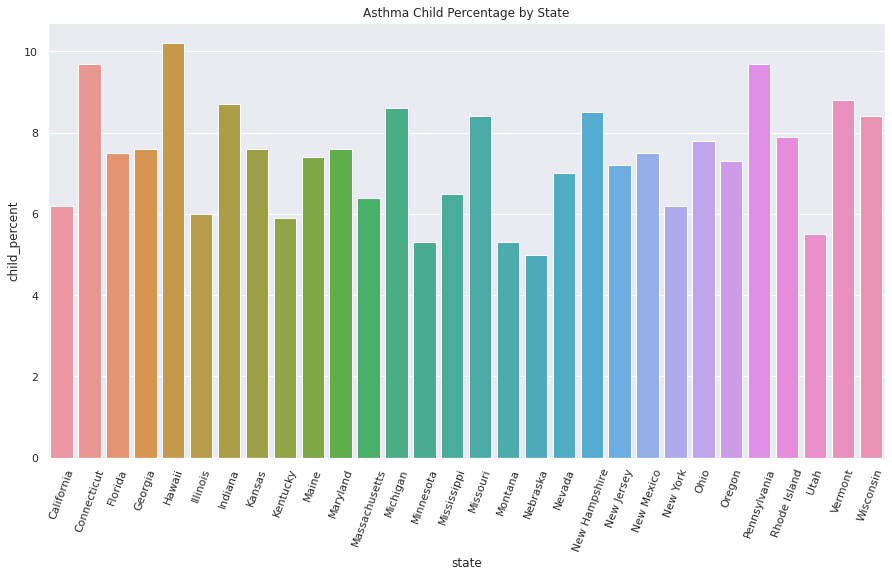

In [20]:
sns.set(rc = {'figure.figsize':(15,8)})
fig1 = sns.barplot(x ='state', y = 'child_percent', data = aqi_state_asthma)
fig1.set_xticklabels(aqi_state_asthma['state'], rotation = 70);
fig1.set(title = 'Asthma Child Percentage by State')

The plot shows that Hawaii, Pennsylvania, Connecticut, Michigna and Indiana are the top states with the most children impacted by asthma.  

[Text(0.5, 1.0, 'Asthma Adult Percentage by State')]

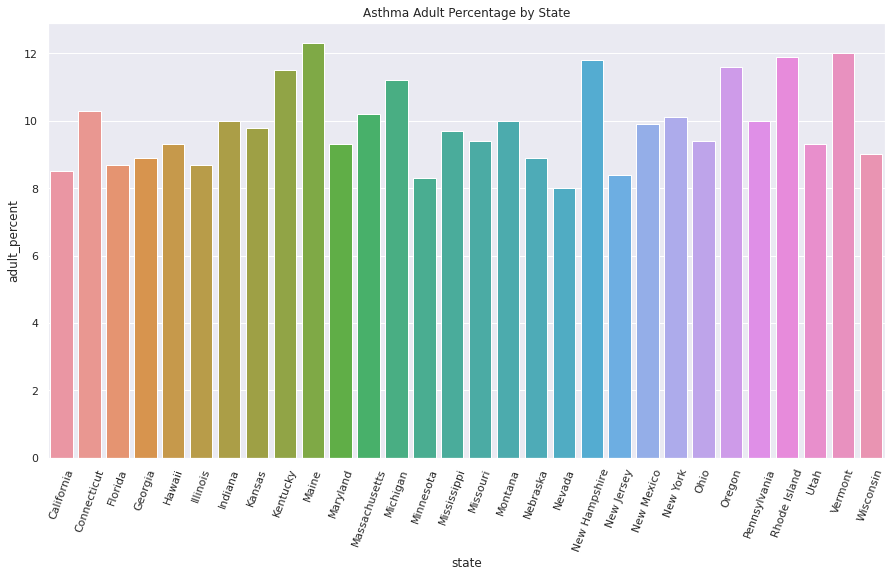

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})
fig2 = sns.barplot(x ='state', y = 'adult_percent', data = aqi_state_asthma)
fig2.set_xticklabels(aqi_state_asthma['state'], rotation = 70);
fig2.set(title = 'Asthma Adult Percentage by State')

The plot shows that Maine, Kentucky, New Hamphsire, Vermont, and Rhode Island are the states with the highest percnetage of adults with asthma. These states had relatively high childhood asthma but none were among the top five states for childhood asthma. 

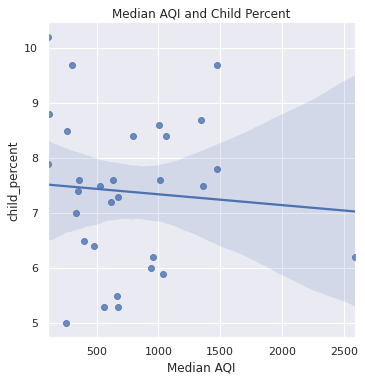

In [24]:
aqi_state_asthma['Median AQI']= aqi_state_asthma['Median AQI'].astype(float)
fig6 = sns.lmplot('Median AQI','child_percent', data = aqi_state_asthma)
fig6.set(title = 'Median AQI and Child Percent')

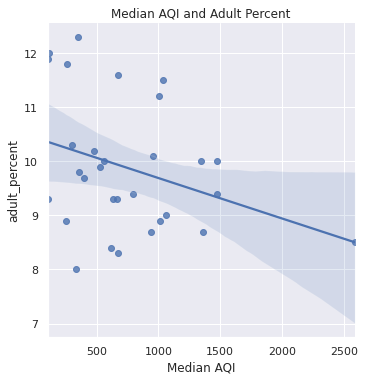

In [25]:
fig7 = sns.lmplot('Median AQI','adult_percent', data = aqi_state_asthma)
fig7.set(title = 'Median AQI and Adult Percent')

We can see from these plots that while there is a negative correlation between Median AQI and the percent of adults with asthma, there doesn't seem to be much of a correlation for children. 

## Data Analysis (AQI)

### Descriptive Analysis

In [26]:
aqi_2010.describe()

,Good days,AQI 90th Percentile,AQI Median
count,53.000000,53.000000,53.000000
mean,221.943396,80.594340,45.292453
std,93.189719,32.567542,15.517185
min,31.000000,21.000000,9.500000
25%,163.000000,58.000000,38.000000
50%,248.000000,80.000000,43.000000
75%,295.000000,93.000000,50.000000
max,358.000000,164.000000,87.000000


We have a dataset from 53 different counties In California. Across these counties, the mean number of days in the year having AQI value 0 through 50 is 221.9 days.

The mean median AQI value is 45.29. Also, 90% of daily AQI values during the year were less or equal to 80.59.

In [27]:
aqi_comb.describe()

,Good days,AQI 90th Percentile,AQI Median,year
count,483.000000,483.000000,483.000000,483.000000
mean,202.981366,85.649068,48.347826,2013.993789
std,92.000573,31.733779,16.251528,2.576216
min,1.000000,21.000000,9.000000,2010.000000
25%,138.000000,61.000000,38.000000,2012.000000
50%,220.000000,82.000000,44.000000,2014.000000
75%,278.500000,101.000000,54.000000,2016.000000
max,359.000000,185.000000,102.000000,2018.000000


From the years 2010-2018 we have a dataset from 53 different counties In California. Across these counties, the mean number of days in the year having AQI value 0 through 50 is 203.0 days.

The median AQI value is 48.35. Also, 90% of daily AQI values during the year were less or equal to 85.65.

We can see that there is already a difference in the AQI descriptive data as we take into account more years past 2010. Good days go down, median AQI goes up, and AQI percentile goes up as well.

### Exploratory Analysis

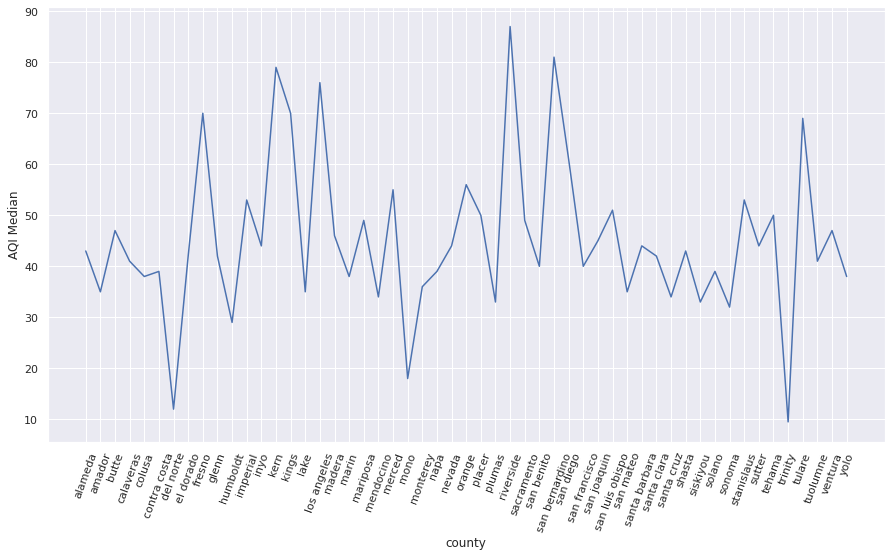

In [28]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(x ='county',y = 'AQI Median', data = aqi_2010)
ax.set_xticklabels(aqi_2010['county'], rotation = 70);

The plot we shows that all county have moderate or good AQI value. Some counties have good AQI value (0-50), while some counties have moderate AQI value (50-100).

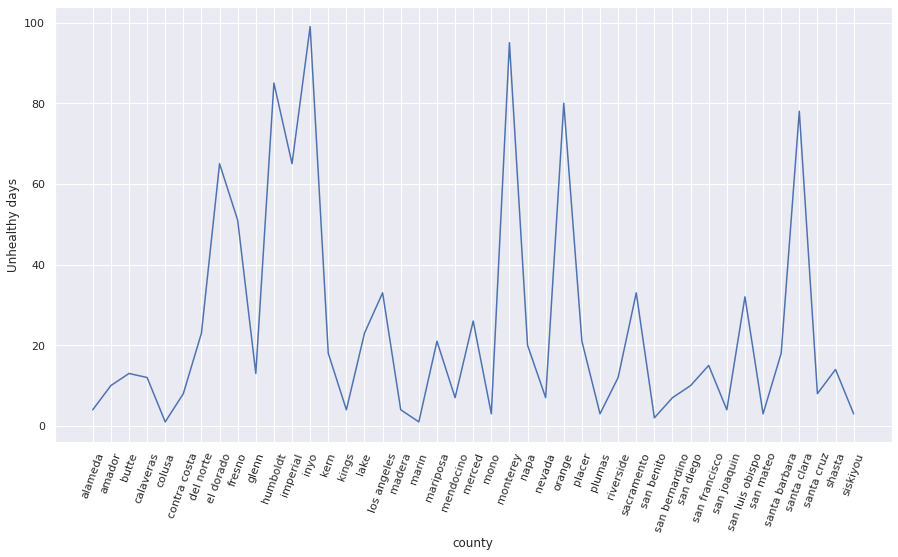

In [29]:
aqi_unhealthy = aqi_2010[aqi_2010['Unhealthy days'] != '.']
aqi_unhealthy['Unhealthy days'] = aqi_unhealthy['Unhealthy days'].astype(int)
ax = sns.lineplot(x ='county',y = 'Unhealthy days', data = aqi_unhealthy)
ax.set_xticklabels(aqi_2010['county'], rotation = 70);
sns.set(rc = {'figure.figsize':(15,8)})

In the county Inyo, 27% days of a year are unhealthy for sensity group, and in some counties like Siskiyou, colusa etc only have few unhealth days within a year. We expect counties with more unhealthy days to have higher cancer rate comparing to counties with less unhealthy day.

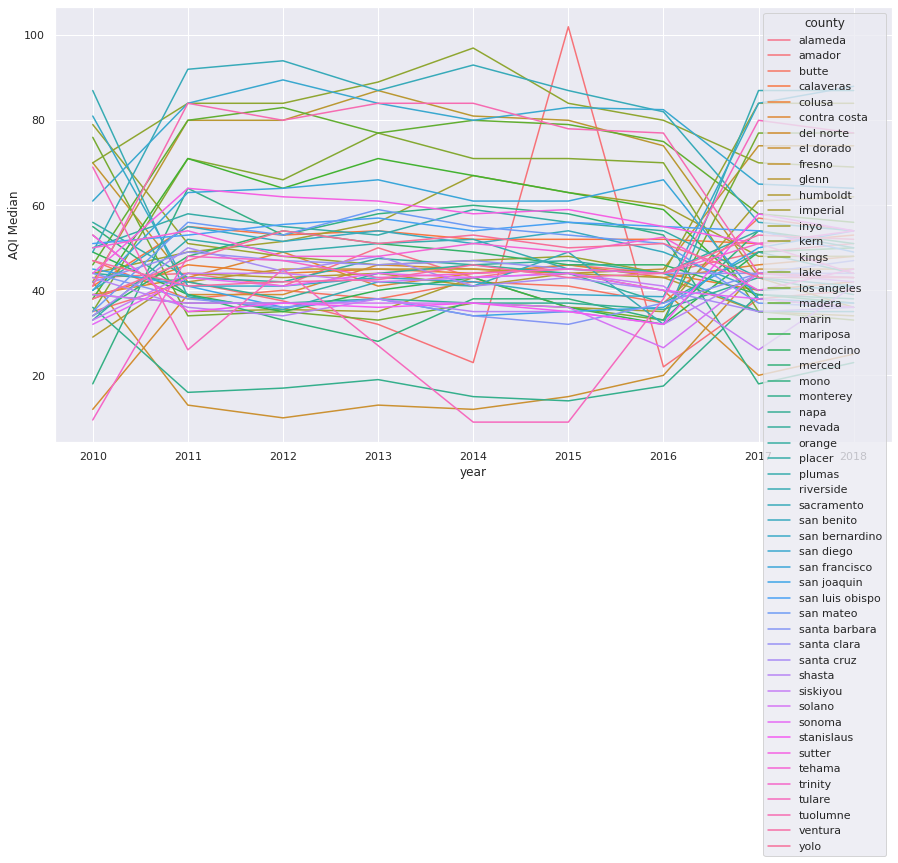

In [30]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.lineplot(x ='year',y = 'AQI Median', hue='county',data = aqi_comb)

The plot shows that over the course of 2010-2018 all counties except one have moderate or good AQI value. Some counties have good AQI value (0-50), while some counties have moderate AQI value (50-100). There seems to be one county in the year 2015 which has a strange change, lets take a closer look. Also, it is interesting to see so much change occurring from 2016 to 2017.

In [31]:
data_2015_aqi = aqi_comb[aqi_comb["year"]==2015]
data_2015_aqi = data_2015_aqi[data_2015_aqi['AQI Median'] > 100]
data_2015_aqi

,county,Good days,Unhealthy days,AQI 90th Percentile,AQI Median,year
1,amador,1,13,149.0,102.0,2015


After taking a closer look, it seems that Amador county is responsible for the outlier in change in 2015. Upon a closer look, it appears that there was a fire in 2015 the [Butte Fire](https://en.wikipedia.org/wiki/Butte_Fire) which was most likely responsible for the large change in AQI Median that year.

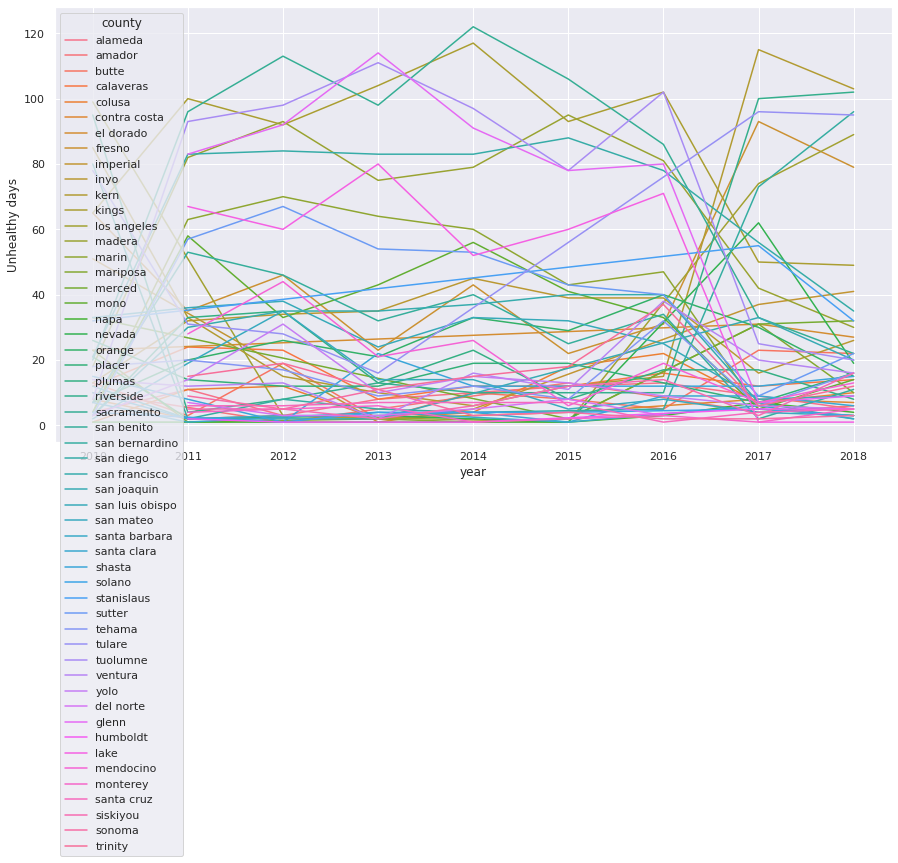

In [32]:
aqi_unhealthy_comb = aqi_comb[aqi_comb['Unhealthy days'] != '.']
aqi_unhealthy_comb['Unhealthy days'] = aqi_unhealthy_comb['Unhealthy days'].astype(int)
ax = sns.lineplot(x ='year',y = 'Unhealthy days', hue='county', data = aqi_unhealthy_comb)
sns.set(rc = {'figure.figsize':(15,8)})

Here we can see that in most counties, the number of unhealthy days is relatively stable across our time frame. However, there is a strange change between 2010-2011 and 2016-2017. Several counties switch dramatically in either direction. From a quick research, the transition from El Niño in [2016](https://www.fire.ca.gov/incidents/2016/) to strong Santa Ana winds in [2017](https://www.fire.ca.gov/incidents/2017/) may be responsible for that change. As the number of acres burned nearly trippled, thus causing AQI to be volatile over that year.

## Data Analysis (Cancer)


### Descriptive Analysis

In [33]:
len(county_cancer_all['county'].unique())

47

In this data set from 2010-2018, it lists the rates and counts of lung and bronchus cancer from counties in California. However, due to small sample sizes in certain counties, 47 counties are listed in this dataset.

In [34]:
county_cancer_all.shape

(419, 4)

Also, after cleaning the data, we can see that there are 419 data entries across the 9 years. This should be substantial to see trends across the years in each county.

In [35]:
county_cancer_all.describe()

,year,"rate per 100,000",count
count,419.000000,419.000000,419.000000
mean,2013.990453,46.019919,358.529833
std,2.583515,9.002172,588.653378
min,2010.000000,26.588600,15.000000
25%,2012.000000,39.313750,71.500000
50%,2014.000000,44.755800,152.000000
75%,2016.000000,51.332150,367.000000
max,2018.000000,82.774400,3819.000000


Across these 47 listed counties, we can see that the mean cancer rate is 46.02 cases per 100,000 people. This equates roughly to 349 individuals. It's important to note that there is a smaller standard deviation in the number of cases (9) but a large deviation in the counts (588.65).

### Exploratory Analysis

In [36]:
county_cancer_all.dtypes

year                  int64
county               object
rate per 100,000    float64
count                 int64
dtype: object

<AxesSubplot:xlabel='year', ylabel='rate per 100,000'>

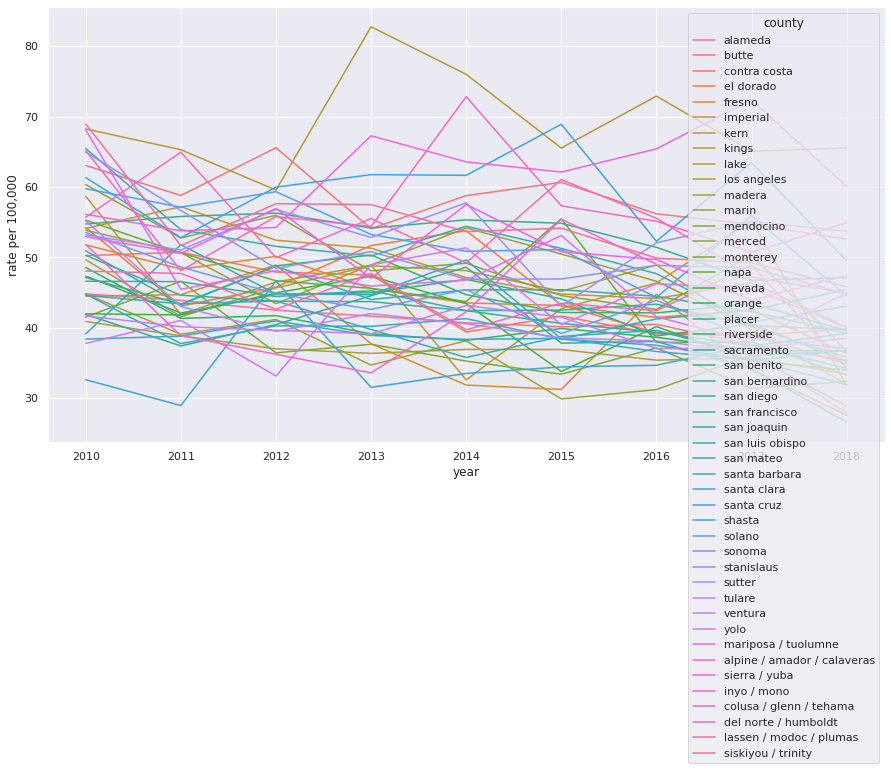

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x='year', y='rate per 100,000', hue='county', data=county_cancer_all)

It is nice to see that generally across the 47 listed counties, the rates are relatively close. However, in 2013 and 2014 two counties feature abnormally high rates. Lets take a closer look at to which counties those are.

In [38]:
data_2013_cancer = county_cancer_all[county_cancer_all["year"]==2013]
data_2013_cancer = data_2013_cancer[data_2013_cancer['rate per 100,000'] > 70]
data_2013_cancer

,year,county,"rate per 100,000",count
290,2013,lake,82.7744,80


In [39]:
data_2014_cancer = county_cancer_all[county_cancer_all["year"]==2014]
data_2014_cancer = data_2014_cancer[data_2014_cancer['rate per 100,000'] > 70]
data_2014_cancer

,year,county,"rate per 100,000",count
384,2014,lake,76.0176,76
419,2014,colusa / glenn / tehama,72.8328,105


From this, we can see that the Lake county and the combined Colusa/Glenn/Tehama county feature high rates during those years. That will be something useful to explore later on.

<AxesSubplot:xlabel='year', ylabel='count'>

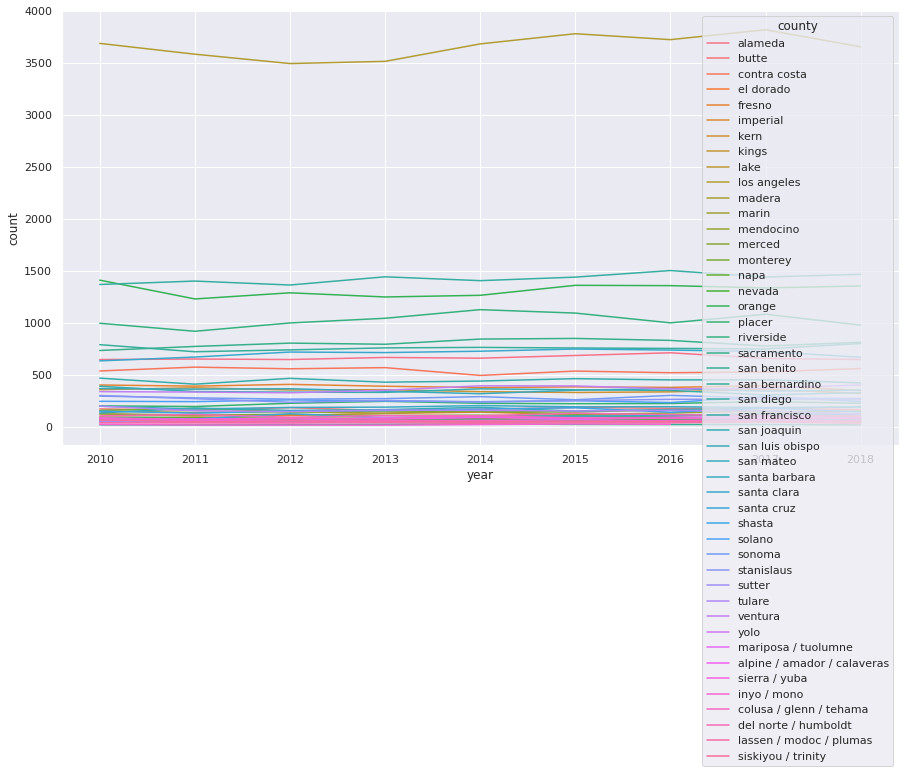

In [40]:
sns.lineplot(x='year', y='count', hue='county', data=county_cancer_all)

From this plot, we can see that there is one county that has a lung and bronchus cancer count that skyrockets far above the other counties. Let's further investigate

In [41]:
data_count = county_cancer_all
data_count = data_count[data_count['count'] > 2500]
data_count

,year,county,"rate per 100,000",count
9,2010,los angeles,40.8923,3688
103,2011,los angeles,38.8553,3584
197,2012,los angeles,37.0027,3494
291,2013,los angeles,36.3578,3515
385,2014,los angeles,36.9159,3683
479,2015,los angeles,36.9024,3781
573,2016,los angeles,35.3922,3724
667,2017,los angeles,35.7070,3819
761,2018,los angeles,33.4156,3655


From here, we can see that it is the Los Angeles county. With a little bit of research, we can find that Los Angeles county features a population size of 10 million people. Three times more than the nex largest county. This might suggest why there are so many more cases, but we will have to investigate further in our analysis.

## Inference

### Analysis (AQI Median vs Lung and Bronchus Cancer rate - 2010)

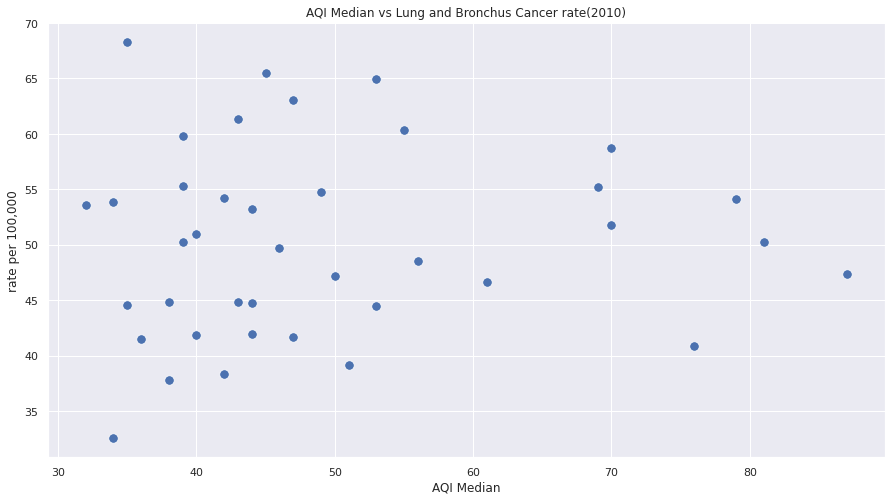

In [42]:
x1_median_2010 = aqi_cancer_2010['AQI Median'];
y1_median_2010 = aqi_cancer_2010['rate per 100,000'];
sns.scatterplot(x1_median_2010,y1_median_2010,s=90);
plt.title('AQI Median vs Lung and Bronchus Cancer rate(2010)');

We first begin with our analysis on the `AQI Median` and it's correlation to Lung and Bronchus cancer rates in 2010. Upon looking at the graph, it seems very sparse and skewed right. Although it might look a positively correlated, it is not a strong correlation.

### Analysis (AQI 90th Percentile vs Lung and Bronchus Cancer rate - 2010)

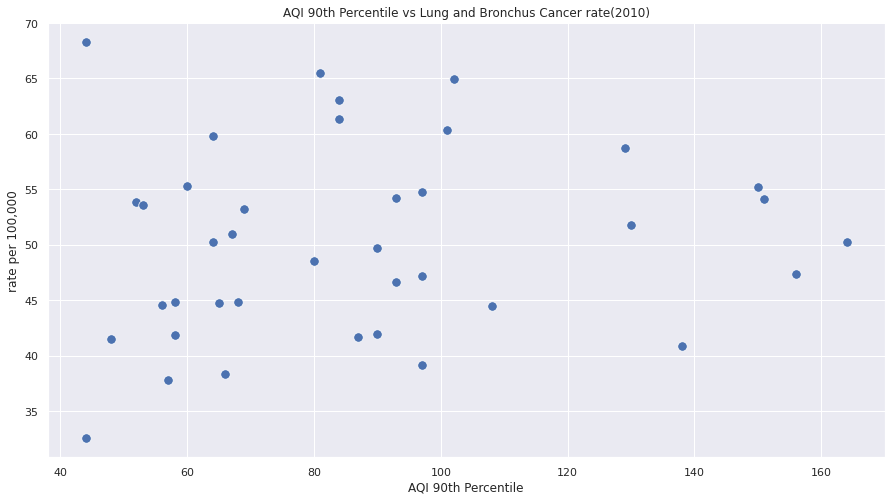

In [43]:
x1_90_2010 = aqi_cancer_2010['AQI 90th Percentile'];
y1_90_2010 = aqi_cancer_2010['rate per 100,000'];
sns.scatterplot(x1_90_2010,y1_90_2010,s=90);
plt.title('AQI 90th Percentile vs Lung and Bronchus Cancer rate(2010)');

Next we start with our analysis on the `AQI 90th Percentile` and it's correlation to Lung and Bronchus cancer rates in 2010. Upon looking at the graph, it seems very sparse as well but this time more evenly distributed. Also, it has a small but noticeable positive correlation, although it is not a strong correlation.

In [44]:
aqi_cancer_2010.corr()

,year,"rate per 100,000",count,Good days,AQI 90th Percentile,AQI Median
year,NaN,NaN,NaN,NaN,NaN,NaN
"rate per 100,000",NaN,1.000000,-0.196670,-0.084525,0.127423,0.064460
count,NaN,-0.196670,1.000000,-0.515249,0.354887,0.471327
Good days,NaN,-0.084525,-0.515249,1.000000,-0.925218,-0.956127
AQI 90th Percentile,NaN,0.127423,0.354887,-0.925218,1.000000,0.954807
AQI Median,NaN,0.064460,0.471327,-0.956127,0.954807,1.000000


Upon looking at the correlation of the AQI and Cancer dataset from 2010, we can see that our analysis was correct. `AQI 90th Percentile` and `AQI Median` are positively correlated with cancer `rate per 100,000`. However, these values are very small being **0.127** and **0.064** respectively. 

### Analysis (AQI Median vs Lung and Bronchus Cancer rate - 2010-2018)

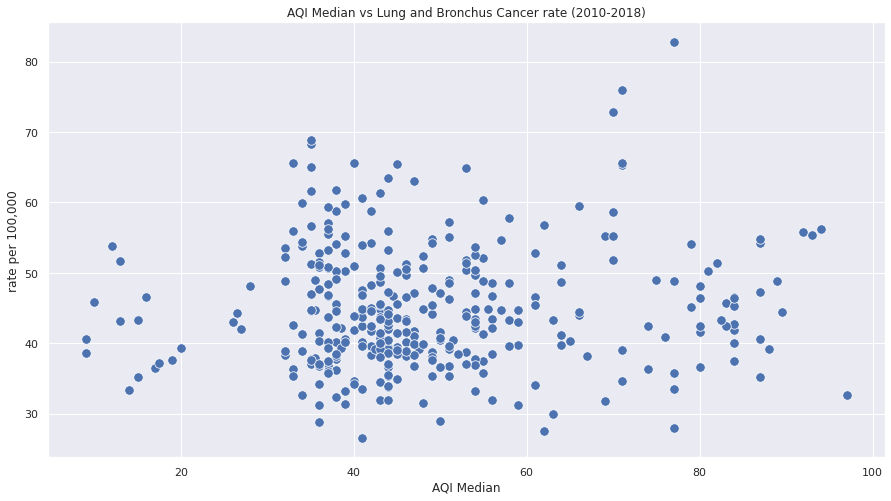

In [45]:
x1_median_comb = aqi_cancer_comb['AQI Median'];
y1_median_comb = aqi_cancer_comb['rate per 100,000'];
sns.scatterplot(x1_median_comb,y1_median_comb,s=90);
plt.title('AQI Median vs Lung and Bronchus Cancer rate (2010-2018)');

Now, as we zoom out at the entire length of the data set, lets see what we find. In our analysis on the `AQI Median` and it's correlation to Lung and Bronchus cancer rates from 2010-2018 there are a few changes. Upon looking at the graph, it seems much more condensed and full. This time, the median looks to be indifferent. It neither looks strongly or negatively correlated.

### Analysis (AQI 90th Percentile vs Lung and Bronchus Cancer rate - 2010-2018)

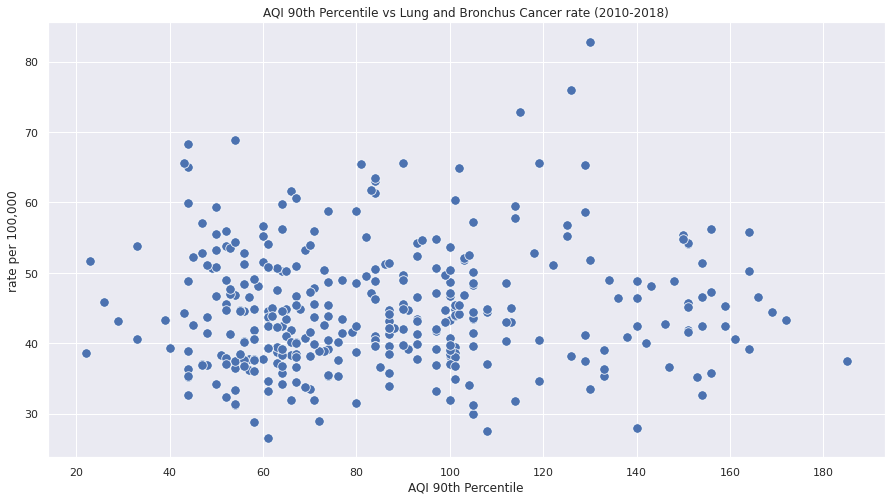

In [46]:
x1_90_comb = aqi_cancer_comb['AQI 90th Percentile'];
y1_90_comb = aqi_cancer_comb['rate per 100,000'];
sns.scatterplot(x1_90_comb,y1_90_comb,s=90);
plt.title('AQI 90th Percentile vs Lung and Bronchus Cancer rate (2010-2018)');

Now, moving onto our analysis on the `AQI 90th Percentile` and it's correlation to Lung and Bronchus cancer rates from 2010-2018, it's changes seem more dramatic. Upon looking at the graph, it seems very full and concentrated. Also, it has a small positive correlation, although it is small, we are unsure if it is more than or less than that of the singular year of 2010.

In [47]:
aqi_cancer_comb.corr()

,year,"rate per 100,000",count,Good days,AQI 90th Percentile,AQI Median
year,1.000000,-0.353087,0.005627,-0.019631,0.014373,0.047511
"rate per 100,000",-0.353087,1.000000,-0.178700,-0.021449,0.067740,0.073509
count,0.005627,-0.178700,1.000000,-0.076659,0.111259,0.135187
Good days,-0.019631,-0.021449,-0.076659,1.000000,-0.830370,-0.786127
AQI 90th Percentile,0.014373,0.067740,0.111259,-0.830370,1.000000,0.914901
AQI Median,0.047511,0.073509,0.135187,-0.786127,0.914901,1.000000


Upon looking at the correlation of the AQI and Cancer dataset from 2010-2018, we can see that our analysis was on track. `AQI 90th Percentile` and `AQI Median` are positively correlated with cancer `rate per 100,000`. However, these values are very small being **0.068** and **0.073** respectively. These show a drop in correlation with `AQI 90th Percentile` but a slight rise for `AQI Median` from the singled out year of 2010. 

### Analysis (AQI Median (2011) vs Lung and Bronchus Cancer rate (2016)

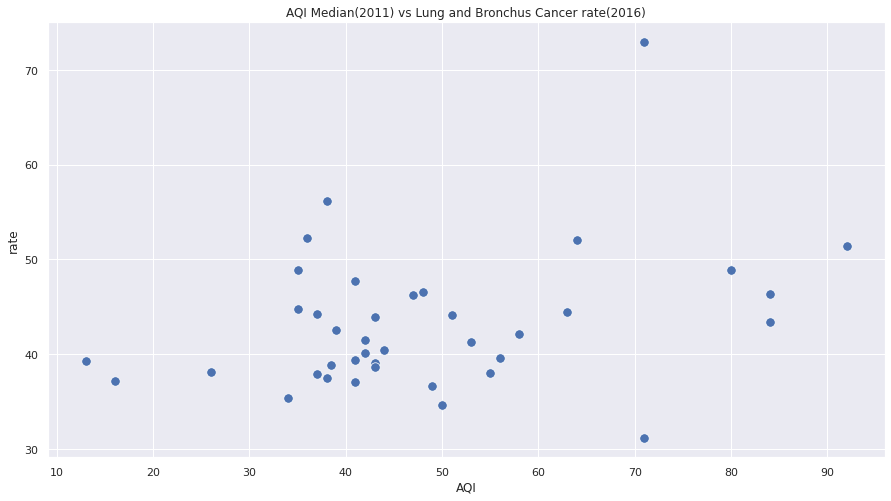

In [48]:
aqi_cancer_fiveyears = pd.merge(county_cancer_2016, aqi_2011, on='county')
aqi_cancer_fiveyears.columns = ['year', 'county', 'rate' ,'count','Good days', 'Unhealthy days'
                           ,'AQI 90th Percentile', 'AQI']

x1_fiveyears = aqi_cancer_fiveyears['AQI'];
y1_fiveyears = aqi_cancer_fiveyears['rate'];
sns.scatterplot(x1_fiveyears,y1_fiveyears,s=90);
plt.title('AQI Median(2011) vs Lung and Bronchus Cancer rate(2016)');

Since we were struggling to find strong correlation from year to year, lets do a shift. Since we know from our background research that [cancer takes time to develop](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6033955) lets see what we find when we see cancer rates following previous years AQI. In our analysis on the `AQI Median` from 2011 and it's correlation to Lung and Bronchus cancer rates from 2016 there are a few changes. Upon looking at the graph, it is still sparse from the fewer amount of data points. However, this time, the median looks to be far more positively correlated than our previous findings.

### Regression on AQI Median vs Lung and Bronchus Cancer rate - 2010

In [49]:
#Regression
aqi_cancer_2010.columns = ['year', 'county', 'rate' ,'count','Good days', 'Unhealthy days'
                           ,'AQI 90th Percentile', 'AQI']
outcome, predictors = patsy.dmatrices('rate ~ AQI', aqi_cancer_2010)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.1544
Date:                Mon, 06 Jun 2022   Prob (F-statistic):              0.697
Time:                        12:57:09   Log-Likelihood:                -138.28
No. Observations:                  39   AIC:                             280.6
Df Residuals:                      37   BIC:                             283.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.3268      4.972      9.719      0.0

From running our regression on AQI Median and the cancer rate from the year 2010 we are not surprised. With a p-value of 0.697 and assuming the standard p-value threshold of 0.05, 0.697 > 0.05 thus we must accept the null hypothesis. We are unable to accept the claim on this single year analysis. However, lets see if this changes when we broaden our scope.

### Regression on AQI Median vs Lung and Bronchus Cancer rate - 2010-2018

In [50]:
# overall
#aqi_cancer_comb['rate per 100,000'] = aqi_cancer_comb['rate per 100,000'].astype(float)
aqi_cancer_comb.columns = ['year', 'county', 'rate' ,'count','Good days', 'Unhealthy days'
                           ,'AQI 90th Percentile', 'AQI']
outcome, predictors = patsy.dmatrices('rate ~ AQI', aqi_cancer_comb)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.891
Date:                Mon, 06 Jun 2022   Prob (F-statistic):              0.170
Time:                        12:57:10   Log-Likelihood:                -1248.5
No. Observations:                 350   AIC:                             2501.
Df Residuals:                     348   BIC:                             2509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9570      1.428     30.084      0.0

Similarly, from running our regression on AQI Median and the cancer rate from the years 2010-2018 we are not surprised. With a p-value of 0.170 and assuming the standard p-value threshold of 0.05, 0.170 > 0.05 thus we must accept the null hypothesis. We are unable to accept the claim on this multi-year analysis. However, We can see that our evidence is beginning to point us toward the right direction. That while a single year may not predict change, nor does a span of years predict change, perhaps a shift of years will.

### Regression on AQI Median (2011) vs Lung and Bronchus Cancer rate (2016)

In [51]:
# five years later

outcome, predictors = patsy.dmatrices('rate ~ AQI', aqi_cancer_fiveyears)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     4.543
Date:                Mon, 06 Jun 2022   Prob (F-statistic):             0.0398
Time:                        12:57:10   Log-Likelihood:                -130.20
No. Observations:                  39   AIC:                             264.4
Df Residuals:                      37   BIC:                             267.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4556      3.316     10.995      0.0

Alas, from running our regression on AQI Median from 2011 and the cancer rate from the year 2016 we are pleasantly surprised. With a p-value of 0.040 and assuming the standard p-value threshold of 0.05, 0.040 < 0.05 thus we can reject the null hypothesis. From this regression we are able to accept the claim of the impact of AQI on cancer rates. It is indeed that while AQI does not seem to have an immediate impact, it does have a delayed impact. With the consideration of our background research and our analysis we are able to infer there is a statistically significant relationship between AQI and cancer rates after 5 years.

### Asthma Inference

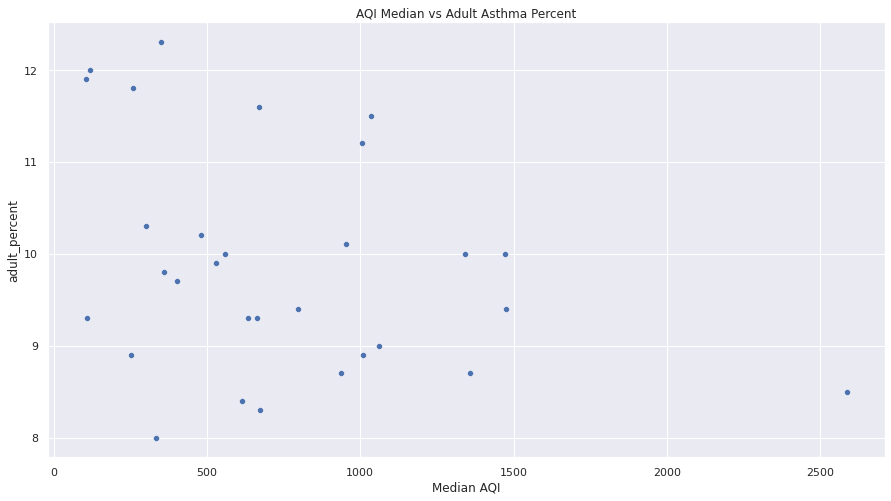

In [52]:
sns.scatterplot(x= 'Median AQI', y = 'adult_percent', data = aqi_state_asthma);
plt.title('AQI Median vs Adult Asthma Percent');

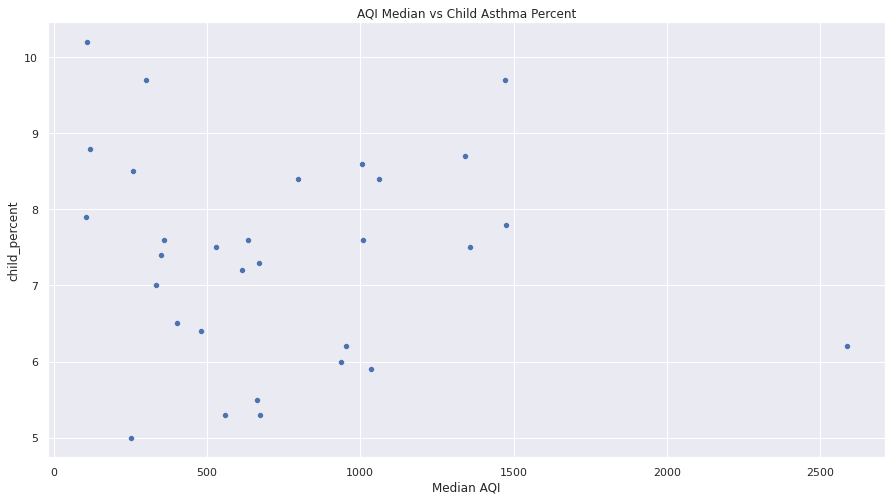

In [53]:
sns.scatterplot(x= 'Median AQI', y = 'child_percent', data = aqi_state_asthma);
plt.title('AQI Median vs Child Asthma Percent');

In [54]:
aqi_state_asthma.rename(columns = {'Median AQI': 'AQI'}, inplace = True)

outcome, predictors = patsy.dmatrices('AQI ~ adult_percent', aqi_state_asthma)

model = sm.OLS (outcome, predictors, data = aqi_state_asthma)
res_1 = model.fit()
res_1

In [55]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     3.384
Date:                Mon, 06 Jun 2022   Prob (F-statistic):             0.0765
Time:                        12:57:10   Log-Likelihood:                -228.74
No. Observations:                  30   AIC:                             461.5
Df Residuals:                      28   BIC:                             464.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2171.0231    779.099      2.787

After running our regression for adult asthma percentage, we observed that there is no direnct relation between adult asthma rates and AQI, but the p-value of 0.076 is close to being significant, therefore there might still be some effect between the two variables. This goes to show that there might be a long-term effect of AQI on asthma rates. 

In [56]:
aqi_state_asthma.rename(columns = {'Median AQI': 'AQI'}, inplace = True)

outcome, predictors = patsy.dmatrices('AQI ~ child_percent', aqi_state_asthma)

model = sm.OLS (outcome, predictors, data = aqi_state_asthma)
res_2 = model.fit()
res_2

In [57]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.1652
Date:                Mon, 06 Jun 2022   Prob (F-statistic):              0.688
Time:                        12:57:10   Log-Likelihood:                -230.36
No. Observations:                  30   AIC:                             464.7
Df Residuals:                      28   BIC:                             467.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       968.3331    550.603      1.759

After running our regression for child asthma percentage, we observed that there is no direnct relation between Asthma rates and AQI. Given our p-value of 0.688, we will keep our null hypothesis. 

# Ethics & Privacy

The dataset we used for cancer is pretty solid, as diagnosed cases of cancer are required by law to be reported. However, we are missing data from 11 California counties due to their small sample size. Despite this, we don’t believe that this will affect the ethics of our analysis, as those small sample sizes might actually misrepresent the rates from those counties, and in that sense our analysis is actually better off without them. The dataset we used for asthma rates relies on the Behavioral Risk Factor Surveillance System, which is a telephone-based survey system. While it is one of the largest health survey systems in the world, it is likely to still be biased because of the types of people who choose to use the time to respond to the survey as well as the types of people who even have phones to respond to the survey with. However, we believe that this bias will not lead to any sort of unethical conclusions and that it still gives us a good idea of asthma rates within the United States. Additionally, we have considered the fact that there are multiple other factors that contribute to respiratory illnesses, like smoking, genetics, and occupation. In spite of these factors, we feel that overall our analysis will be useful. However, one big confounding variable to consider would be COVID-19. Hospital data might be significantly biased because COVID-19 affects the lungs. As a result, if we were to use more recent data, we would probably get a lot more instances of respiratory issues overall. In particular, areas with higher rates of COVID-19 will probably also have higher rates of respiratory issues, which could be a big issue for our analysis. To address this, we could simply take data from before the pandemic, although this will make it so that we are not technically considering the full picture. In terms of privacy and terms of use, if the data is provided by the government and made publicly available, there should be no issues when it comes to using it. Overall, our analysis will mostly likely not be problematic because pollution is an issue that affects us all, and all of us can benefit from understanding its effects a little better. 

# Conclusion & Discussion

In summary, our project looked at California county pollution data, represented by AQI values, and looked for a relationship of those values to rates of lung and bronchus cancer throughout those counties. To do this, we first cleaned and combined datasets, making it so that we had counties and their information lined up by year. We then utilized scatterplots and linear regression to find how strongly correlated AQI in each of the counties was to lung and bronchus cancer rates. We first did this using 2010 data. We compared both the AQI median and 90th percentile AQI to the rate of lung and bronchus cancer. Both the scatterplot and linear regression indicated very low correlation rates. We then did this with the data as a whole, ranging from 2010 to 2018, once again comparing both AQI medians and 90th percentile AQIs to the rate of lung and bronchus cancer. Once again, the scatterplot and linear regression indicated low correlation rates. It is interesting to note, however, that our p-value for the linear regression decreased significantly. Finally, we compared AQI data from 2011 to cancer data from 2016. By comparing spaced out data, we hoped to see the effects of pollution on the development of lung and bronchus cancer, as opposed to merely looking at the correlation of the AQI to cancer rates in a county at any given year. From our scatterplot and linear regression, we find that in this case it is much more correlated than before, which is reasonable given the fact that cancer takes time to develop. Overall, we feel it is safe to conclude that AQI is definitely correlated with lung and bronchus cancer rates. 

A limitation of this project is that it only looks within California as opposed to a larger population. As a result, our results might not be able to generalize. Another limitation is that while we realized that the correlations between AQI and cancer rates were quite weak at any given year and that we should space the years out, we are not certain how many years we should space it out, as cancer develops in different amounts of time for different individuals. This could become a whole other research question in and of itself. Overall, however, there does appear to be a correlation between AQI and the development of lung and bronchus cancer rates. While the statement “local pollution is correlated with development of lung cancer in the area” is not a crazy, novel idea, we believe that by reaffirming this issue with our project, it can remind people of the incredibly consequential long term effects of air pollution, and hopefully urge people to take action now to curb air pollution in their communities in order to prevent diseases from manifesting in the future. 


# Team Contributions

- **Nilou Shahbandi**: Finding Data, Data Cleaning (Asthma), Data Analysis, Video Editing
- **Leonardo Gonzalez**: Finding Data, Data Cleaning, Data Analysis (Asthma)
- **Brian Chen**: Finding Data, Ethics and Privacy, Conclusion and Discussion
- **Tin-Trung Pham**: Finding data, Data Cleaning, Research & Background, Data Analysis
- **Zhongkang(Ken) Fang**: Finding data(AQI), Data Cleaning(AQI), Data Analysis(AQI vs Cancer)